In [1]:
%pip install -q git+https://github.com/huggingface/transformers.git
%pip install -q datasets seqeval
%pip install accelerate -U
%pip install pillow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached torch-2.2.2-cp312-cp312-win_amd64.whl.metadata (26 kB)
  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using cached Jinja2-3.1.3-py3-none-any.whl.metadata (3.3 kB)
  Using cached MarkupSafe-2.1.5-cp312-cp312-win_amd64.whl.metadata (3.1 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/297.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/297.3 kB 660.6 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/297.3 kB 787.7 kB/s eta 0:00:01
   -------------------- ------------------- 153.6/297.3 kB 1.1 MB/s eta 0:00:01
   ------------------------------------- -- 276.5/297.3 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 297.3/297.3 kB 1.5 MB/s eta 0:00:00
Using cached torch-2.2.2-cp312-cp312-win_amd64.whl (198.5 MB)
Usi

In [6]:
from datasets import load_dataset 

# this dataset uses the new Image feature :)
dataset = load_dataset("layoutlmv3.py",trust_remote_code=True)

In [7]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'bboxes', 'ner_tags', 'image_path', 'image'],
        num_rows: 3
    })
    test: Dataset({
        features: ['id', 'tokens', 'bboxes', 'ner_tags', 'image_path', 'image'],
        num_rows: 2
    })
})

In [8]:
dataset["train"].features

{'id': Value(dtype='string', id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'bboxes': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['num_facture', 'date_facture', 'fournisseur', 'client', 'mat_client', 'mat_fournisseur', 'tva', 'pourcentage_tva', 'remise', 'pourcentage_remise', 'timbre', 'fodec', 'ttc', 'devise', 'net_ht'], id=None), length=-1, id=None),
 'image_path': Value(dtype='string', id=None),
 'image': Image(decode=True, id=None)}

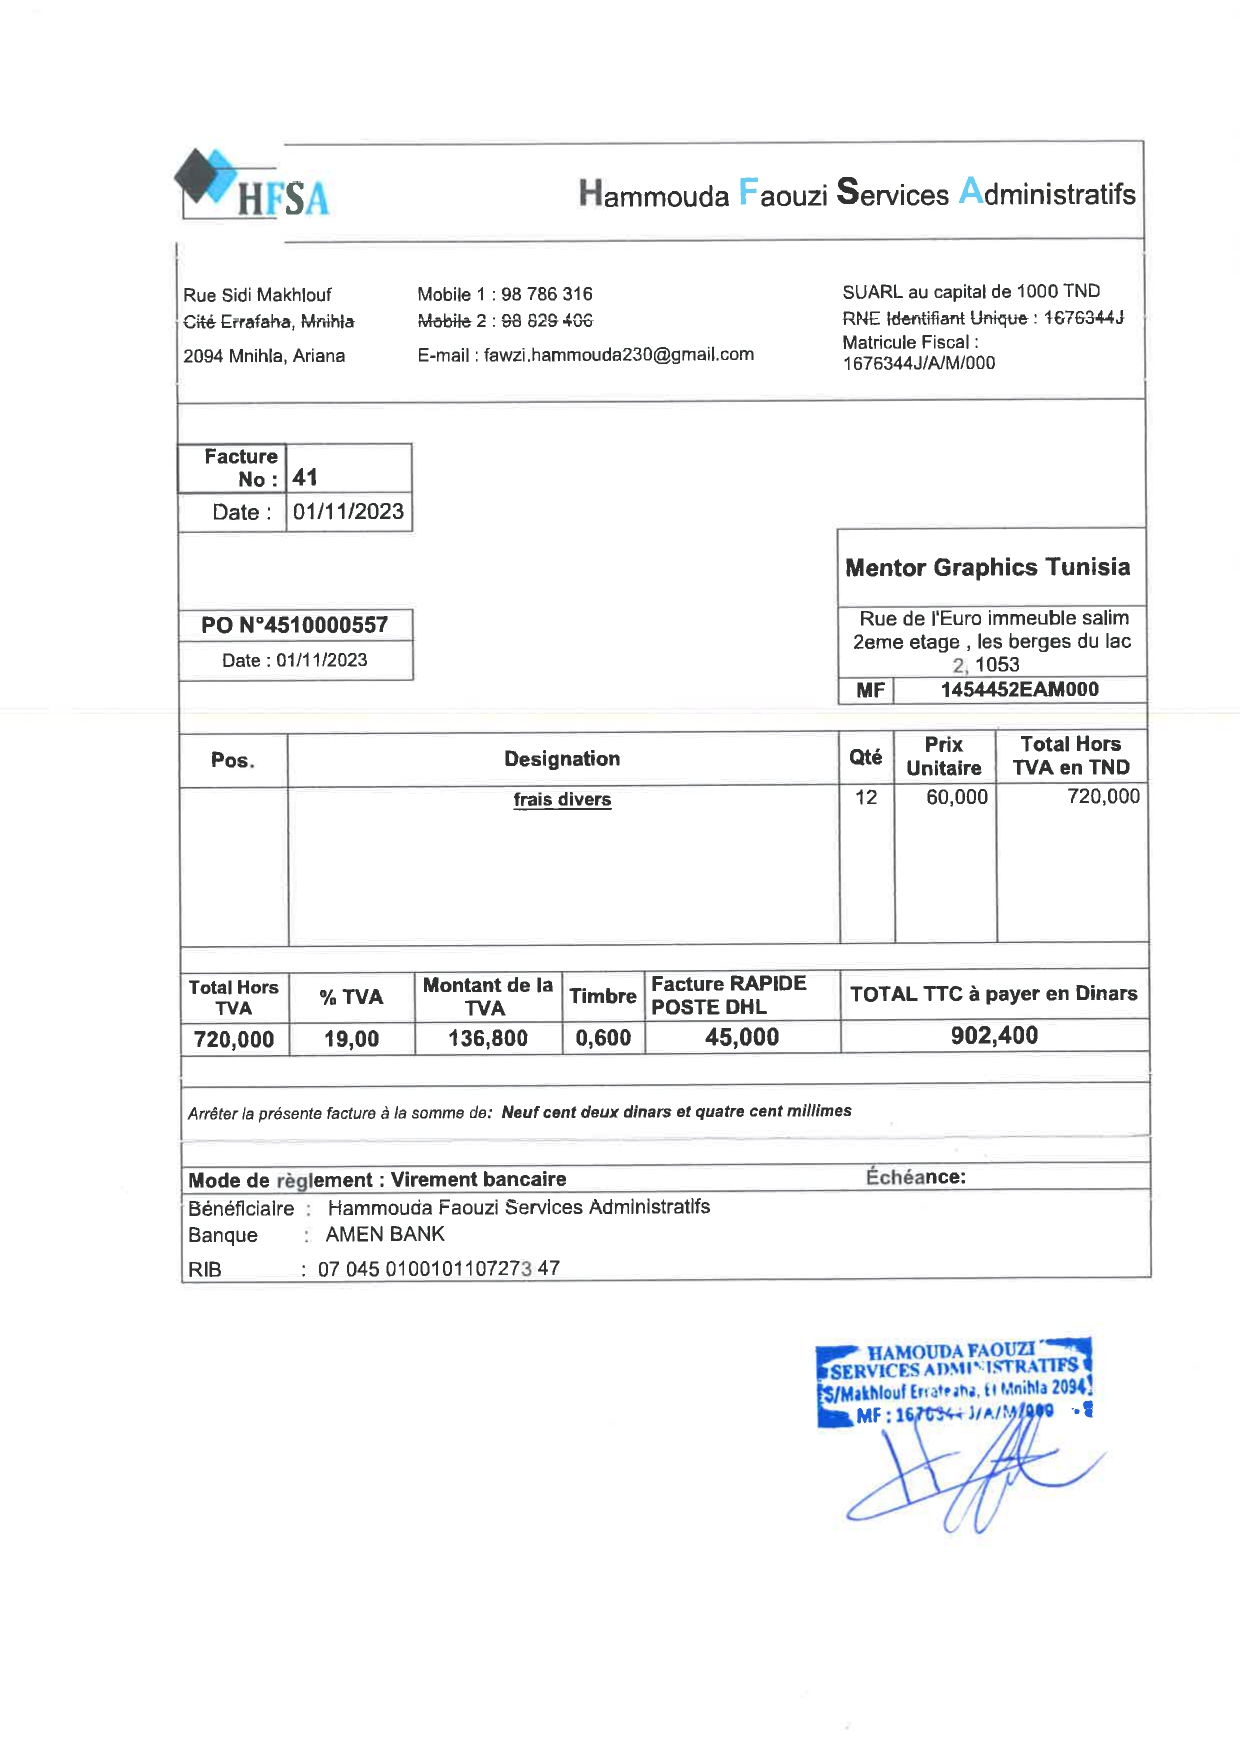

In [9]:
example = dataset["train"][0]
example["image"]

In [10]:
words, boxes, ner_tags = example["tokens"], example["bboxes"], example["ner_tags"]
print(words)
print(boxes)
print(ner_tags)

['Hammouda', 'Faouzi', 'Services', 'Administratifs', '1676344J/A/M/000', '|01/11/2023', 'Mentor', 'Graphics', 'Tunisia', '1454452EAM000', 'TND', '0,600', '19,00', '136,800', '902,400', '720,000']
[[467, 102, 587, 118], [596, 101, 666, 118], [675, 100, 765, 117], [773, 100, 916, 116], [680, 202, 802, 210], [237, 286, 325, 296], [682, 318, 747, 328], [753, 317, 837, 331], [842, 317, 911, 328], [759, 388, 886, 397], [878, 432, 911, 441], [464, 586, 508, 598], [262, 587, 305, 598], [362, 586, 425, 598], [767, 584, 837, 596], [156, 587, 220, 599]]
[2, 2, 2, 2, 5, 1, 3, 3, 3, 4, 13, 10, 7, 6, 12, 14]
